In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tabulate import tabulate
import locale
import matplotlib.pyplot as plt # Import Matplotlib
# --- 1. INPUT DATA ---
print("--- 1. INPUT DATA (Membaca CSV) ---")
try:
    df_raw = pd.read_csv('dataset.laporan.csv', index_col=0)
except FileNotFoundError:
    # Data Placeholder jika file tidak ditemukan
    data_dict = {'desember-2024': [32080568, 541565582, 481519430, 19922231, 255137],
                'maret-2025': [29709278, 542666796, 441561126, 19901284, 2745731]}
    index_labels = ['kas', 'tabungan', 'deposito', 'keuntungan', 'kerugian']
    df_raw = pd.DataFrame(data_dict, index=index_labels)

--- 1. INPUT DATA (Membaca CSV) ---


In [3]:
# --- 2. PRE-PROCESSING & PENGELOLAAN DATA ---
print("\n--- 2. PRE-PROCESSING & PENGELOLAAN DATA ---")

# Transpos data
df = df_raw.T 

# Menampilkan Data Awal
print("DataFrame setelah Transpos:")
print(tabulate(df, headers='keys', tablefmt='fancy_grid', numalign="right"))


--- 2. PRE-PROCESSING & PENGELOLAAN DATA ---
DataFrame setelah Transpos:
╒═══════════════╤═════════════╤═════════════╤═════════════╤══════════════╤═════════════╕
│               │         kas │    tabungan │    deposito │   keuntungan │    kerugian │
╞═══════════════╪═════════════╪═════════════╪═════════════╪══════════════╪═════════════╡
│ desember-2024 │ 3.20806e+07 │ 5.41566e+08 │ 4.81519e+08 │  1.99222e+07 │      255137 │
├───────────────┼─────────────┼─────────────┼─────────────┼──────────────┼─────────────┤
│ maret-2025    │ 2.97093e+07 │ 5.42667e+08 │ 4.41561e+08 │  1.99013e+07 │ 2.74573e+06 │
╘═══════════════╧═════════════╧═════════════╧═════════════╧══════════════╧═════════════╛


In [4]:
# --- 3. FEATURE ENGINEERING & DEFINISI DATA ---
print("\n--- 3. FEATURE DATA (X) dan TARGET (Y) ---")

Y = df['keuntungan']
X = df.drop('keuntungan', axis=1)
X_train, Y_train = X, Y

print(f"Fitur (X) yang digunakan: {list(X.columns)}")
print(f"Target (Y) yang digunakan: keuntungan")

# PENTING: Standarisasi Data (Scaling) untuk SVR
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train) 

scaler_Y = StandardScaler()
# Mengubah dimensi Y agar sesuai dengan kebutuhan scaler
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).flatten() 


--- 3. FEATURE DATA (X) dan TARGET (Y) ---
Fitur (X) yang digunakan: ['kas', 'tabungan', 'deposito', 'kerugian']
Target (Y) yang digunakan: keuntungan


In [5]:
# --- 4. PELATIHAN MODEL & PREDIKSI ---
print("\n--- 4. PELATIHAN MODEL SVR REGRESSOR ---")
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1) 
svr_model.fit(X_train_scaled, Y_train_scaled)
Y_pred_scaled_svr = svr_model.predict(X_train_scaled)

# Inverse Transform: Mengembalikan prediksi ke nilai Rupiah asli
Y_pred_svr = scaler_Y.inverse_transform(Y_pred_scaled_svr.reshape(-1, 1)).flatten()


# Data Placeholder
data_dict = {'desember-2024': [32080568, 541565582, 481519430, 19922231, 255137],
            'maret-2025': [29709278, 542666796, 441561126, 19901284, 2745731]}
index_labels = ['kas', 'tabungan', 'deposito', 'keuntungan', 'kerugian']
df_raw = pd.DataFrame(data_dict, index=index_labels)
df = df_raw.T 

Y = df['keuntungan']
X = df.drop('keuntungan', axis=1)
X_train, Y_train = X, Y

# Scaling Wajib untuk SVR
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train) 
scaler_Y = StandardScaler()
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).flatten() 

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1) 
svr_model.fit(X_train_scaled, Y_train_scaled)
Y_pred_scaled_svr = svr_model.predict(X_train_scaled)
Y_pred_svr = scaler_Y.inverse_transform(Y_pred_scaled_svr.reshape(-1, 1)).flatten()
rmse_svr = np.sqrt(mean_squared_error(Y_train, Y_pred_svr))
mae_svr = mean_absolute_error(Y_train, Y_pred_svr)

# Konfigurasi Locale untuk format Rupiah
try:
    locale.setlocale(locale.LC_ALL, 'id_ID.UTF-8') 
except:
    locale.setlocale(locale.LC_ALL, 'Indonesian_Indonesia')

def format_rupiah(x):
    return locale.format_string("%d", x, grouping=True)


--- 4. PELATIHAN MODEL SVR REGRESSOR ---


In [6]:
# --- 5. MENAMPILKAN HASIL & ANALISIS ---
print("--- 5. HASIL & ANALISIS SVR ---")

# a. Perbandingan Prediksi (Tabel)
hasil_df = pd.DataFrame({
    'Periode': df.index,
    'Keuntungan Aktual': Y_train,
    'Keuntungan Prediksi SVR': Y_pred_svr.round(0)
})

hasil_df['Keuntungan Aktual'] = hasil_df['Keuntungan Aktual'].apply(format_rupiah)
hasil_df['Keuntungan Prediksi SVR'] = hasil_df['Keuntungan Prediksi SVR'].apply(format_rupiah)

print("a. TABEL PERBANDINGAN AKTUAL vs. PREDIKSI:")
print(tabulate(hasil_df, headers='keys', tablefmt='fancy_grid', numalign="right"))

# b. Metrik Evaluasi (Tabel)
metrik_svr = pd.DataFrame({
    'Metrik': ['RMSE', 'MAE'],
    'Nilai': [round(rmse_svr, 0), round(mae_svr, 0)]
})
metrik_svr['Nilai'] = metrik_svr['Nilai'].apply(format_rupiah)

print("\nb. TABEL METRIK EVALUASI:")
print(tabulate(metrik_svr, headers='keys', tablefmt='fancy_grid', numalign="right"))

--- 5. HASIL & ANALISIS SVR ---
a. TABEL PERBANDINGAN AKTUAL vs. PREDIKSI:
╒═══════════════╤═══════════════╤═════════════════════╤═══════════════════════════╕
│               │ Periode       │ Keuntungan Aktual   │ Keuntungan Prediksi SVR   │
╞═══════════════╪═══════════════╪═════════════════════╪═══════════════════════════╡
│ desember-2024 │ desember-2024 │ 19.922.231          │ 19.921.184                │
├───────────────┼───────────────┼─────────────────────┼───────────────────────────┤
│ maret-2025    │ maret-2025    │ 19.901.284          │ 19.902.331                │
╘═══════════════╧═══════════════╧═════════════════════╧═══════════════════════════╛

b. TABEL METRIK EVALUASI:
╒════╤══════════╤═════════╕
│    │ Metrik   │   Nilai │
╞════╪══════════╪═════════╡
│  0 │ RMSE     │   1.047 │
├────┼──────────┼─────────┤
│  1 │ MAE      │   1.047 │
╘════╧══════════╧═════════╛


<Figure size 800x500 with 0 Axes>

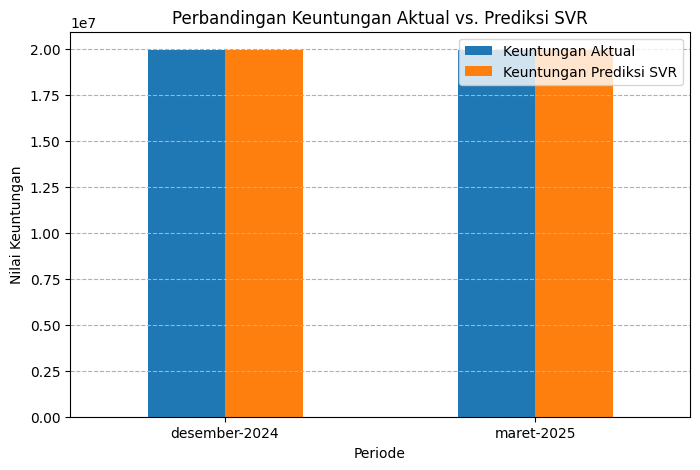

In [11]:
# --- 6. VISUALISASI HASIL (GRAFIK) ---

# GRAFIK PERBANDINGAN PREDISI AKTUAL vs. SVR
plt.figure(figsize=(8, 5))
hasil_df_plot = hasil_df.set_index('Periode')
# Ubah kolom yang sudah diformat Rupiah menjadi numerik untuk plotting
hasil_df_plot['Keuntungan Aktual'] = hasil_df_plot['Keuntungan Aktual'].str.replace('.', '', regex=False).astype(int)
hasil_df_plot['Keuntungan Prediksi SVR'] = hasil_df_plot['Keuntungan Prediksi SVR'].str.replace('.', '', regex=False).astype(int)

hasil_df_plot[['Keuntungan Aktual', 'Keuntungan Prediksi SVR']].plot(kind='bar', figsize=(8, 5))
plt.title('Perbandingan Keuntungan Aktual vs. Prediksi SVR')
plt.ylabel('Nilai Keuntungan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.legend(loc='upper right')
plt.show()

In [10]:
# --- 7. Hasil Akhir dan Perbandingan (Koreksi Baris RMSE/MAE) ---

print("--- Hasil Prediksi dan Metrik Evaluasi SVR ---")

hasil_df = pd.DataFrame({
    'Periode': df.index,
    'Keuntungan Aktual': Y_train,
    'Keuntungan Prediksi SVR': Y_pred_svr.round(0)
})

hasil_df['Keuntungan Aktual'] = hasil_df['Keuntungan Aktual'].apply(format_rupiah)
hasil_df['Keuntungan Prediksi SVR'] = hasil_df['Keuntungan Prediksi SVR'].apply(format_rupiah)

print(tabulate(hasil_df, headers='keys', tablefmt='fancy_grid', numalign="right"))

# KOREKSI: Menggunakan fungsi round() bawaan Python
print(f"\nRMSE (Root Mean Squared Error): {format_rupiah(round(rmse_svr, 0))} Rupiah")
print(f"MAE (Mean Absolute Error): {format_rupiah(round(mae_svr, 0))} Rupiah")
print("-----------------------------------------------------")

--- Hasil Prediksi dan Metrik Evaluasi SVR ---
╒═══════════════╤═══════════════╤═════════════════════╤═══════════════════════════╕
│               │ Periode       │ Keuntungan Aktual   │ Keuntungan Prediksi SVR   │
╞═══════════════╪═══════════════╪═════════════════════╪═══════════════════════════╡
│ desember-2024 │ desember-2024 │ 19.922.231          │ 19.921.184                │
├───────────────┼───────────────┼─────────────────────┼───────────────────────────┤
│ maret-2025    │ maret-2025    │ 19.901.284          │ 19.902.331                │
╘═══════════════╧═══════════════╧═════════════════════╧═══════════════════════════╛

RMSE (Root Mean Squared Error): 1.047 Rupiah
MAE (Mean Absolute Error): 1.047 Rupiah
-----------------------------------------------------
